# SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer, make_moons
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report


In [2]:
# 1. Load and preprocess dataset (Breast Cancer)

data = load_breast_cancer()
X, y = data.data, data.target


In [3]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# 2. Train SVM with Linear and RBF Kernel

svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)

svm_rbf = SVC(kernel='rbf', C=1, gamma=0.1)
svm_rbf.fit(X_train, y_train)

print("Linear SVM Test Accuracy:", svm_linear.score(X_test, y_test))
print("RBF SVM Test Accuracy:", svm_rbf.score(X_test, y_test))



Linear SVM Test Accuracy: 0.956140350877193
RBF SVM Test Accuracy: 0.9649122807017544


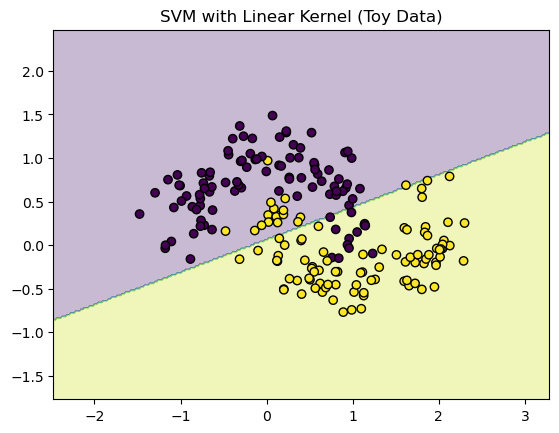

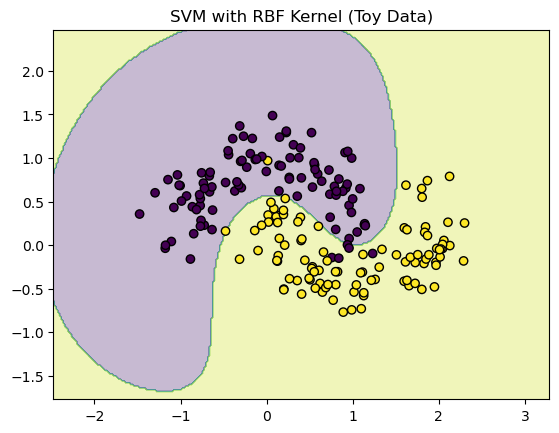

In [11]:
# 3. Visualization using toy dataset (2D for decision boundary)

X_toy, y_toy = make_moons(n_samples=200, noise=0.2, random_state=42)

svm_linear_toy = SVC(kernel="linear", C=1).fit(X_toy, y_toy)
svm_rbf_toy = SVC(kernel="rbf", C=1, gamma=1).fit(X_toy, y_toy)

def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)
    plt.show()

plot_decision_boundary(svm_linear_toy, X_toy, y_toy, "SVM with Linear Kernel (Toy Data)")
plot_decision_boundary(svm_rbf_toy, X_toy, y_toy, "SVM with RBF Kernel (Toy Data)")



In [13]:
# 4. Hyperparameter Tuning with GridSearchCV
# -----------------------------
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)


Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best CV Score: 0.9714285714285715


In [15]:
# 5. Cross-validation Performance

scores = cross_val_score(SVC(kernel='rbf', C=1, gamma=0.1), X, y, cv=5)
print("Cross-validation accuracy:", scores.mean())


Cross-validation accuracy: 0.6274181027790716


In [23]:
# 6. Classification Report
y_pred = svm_rbf.predict(X_test)
print("\nClassification Report (RBF Kernel):\n", classification_report(y_test,y_pred))


Classification Report (RBF Kernel):
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

